# X (Twitter) Sentiment Analyis for Top Airlines in the USA

### Group 8 - Aviators. Members:

1. Joseph Kinuthia (Group leader)
2. Emily Owiti
3. James Mungai
4. Paul Muriithi
5. Raphael Kariuki
6. Sylvia Muchiri

# 1.0 Overview

In this project, we focus on leveraging Natural Language Processing (NLP) techniques to analyze sentiments expressed in a Twitter dataset, specifically within the airline industry domain. The primary objectives include sentiment analysis, the construction of a precise tweet classification model, and the development of a chatbot capable of responding to customer feedback and directing queries to the appropriate resolution teams. By accomplishing these goals, we will create solutions that enable airline companies to extract valuable insights from social media data which will play a big role in enhancing their customer service, improving their service offering and empowering these organizations to make data-driven decisions.

# 1.1 Business understanding

Our dataset includes data for the top 5 airline companies in the USA and these are our primary stakeholders for the project. The key players are United Airlines, US Airways, American Airlines, Delta Airlines and Southwest Airlines.

Below we discuss the general trends and factors that are common in the global airline industry.

The global airline industry is a vital sector that provides air transport services for passengers and cargo. It plays a crucial role in connecting people, businesses, and regions across the world. The industry comprises a diverse range of airlines, including full-service carriers, low-cost carriers (LCCs), regional airlines, and charter airlines. Major players are often categorized into international, national, and regional carriers, each serving specific markets.

### Global airline industry trends:

The trends below were useful in developing our understanding and hence optimal analysis our dataset.

1. Digital transformation and technology adoption:
While late adopters, airlines are increasingly leveraging technology to enhance operational efficiency, customer experiences, and overall service quality. This includes implementing mobile apps, self-service kiosks, AI-powered chatbots, and data analytics for personalized marketing and improved decision-making.

2. Sustainable and environmentally friendly practices:
Environmental sustainability has become a significant focus within the industry. Airlines are investing in more fuel-efficient aircraft, exploring biofuels, and implementing eco-friendly practices to reduce carbon emissions and mitigate their environmental impact.

3. Demand for personalized travel experiences:
Travelers now seek personalized experiences, leading to a shift in airline strategies. Airlines are customizing services, offering ancillary products, and tailoring loyalty programs to meet individual preferences and needs.

4. Partnerships and alliances:
Collaborations, partnerships, and alliances among airlines have become prevalent. These agreements help airlines expand their networks, improve cost-efficiency, and offer travelers more seamless travel options.

5. Health and safety measures post-pandemic:
The COVID-19 pandemic has significantly impacted the industry. Airlines are implementing stringent health and safety protocols to regain traveler confidence. Measures include enhanced cleaning procedures, health screenings, and contactless processes.

### Airline industry profit margins

The net profit margin for airlines is highly influenced by market conditions, fuel prices, operational efficiency, competition, and economic trends. On average, net profit margins for airlines typically range from 2% to 5%. However, it's important to note that individual airline net profit margins may fluctuate, and some airlines may experience periods of losses due to various factors affecting the industry. Airlines with a positive brand tend to have lower customer churn and in return higher pricing and higher revenues.

# 1.2 Problem Statement
The advent of social media has generated an abundance of data, presenting both opportunities and challenges for organizations. This vast pool of data offers unparalleled insights into customer perceptions, preferences, and feedback. However, many organizations are yet to develop frameworks and strategies to effectively analyze and interpret such data. Insights from this data holds the potential to benefit various domains, including business operations, marketing strategies, public opinion analysis, and more.

Our stakeholders (top American airline companies) have requested us to analyze social media raw data and showcase the customer sentiment as either positive, neutral or negative while identifying the top drivers for these sentiments.

Our dataset is sourced from Twitter, capturing a wide array of tweets, and our primary focus is analyzing and visualizing drivers for key & top public & customer sentiment. We aim to address critical questions and challenges faced by airlines, such as understanding passenger sentiments from unstructured data and predicting engagement metrics. By doing so, we strive to provide airlines with the tools and knowledge needed to enhance customer experiences, optimize operations, and make data-driven decisions in an ever-evolving and competitive industry.


# 1.3 Project Objectives

### 1.3.1 Main objective
The primary goal of the project is sentiment analysis to analyze raw tweets to extract the public sentiment as well as development of a chatbot.




### 1.3.2 Specific objectives
1. To analyze the data & derive the public's sentiment (positive, neutral or negative) for our client
2. To build a model that can classify raw tweets into the three sentiment classes for future use
3. To visualize the top drivers for each sentiment category to help management target service delivery improvement
4. To create a chatbot to monitor customer feedback on X that provides realtime responses to customers

# 1.4 Research questions

The project will be answer the below research questions:
1. What are the predominant sentiments expressed by passengers on X regarding major U.S. airlines?
2. What are the most common reasons for negative sentiments among airline passengers, as expressed in their tweets?
3. How does the sentiment compare between the various airlines in our dataset (highest positive, negative, neutral)?

# 1.5 Data overview

Our dataset was publicly sourced from crowdflower website and is made up of Twitter users' tweets and retweets.
The dataset has 14,640 rows and 20 columns.
This Twitter data was collected from February 2015 and contributors were engaged in classifying tweets into categories of positive, negative, and neutral sentiments. Additionally, contributors were tasked with categorizing the reasons behind negative sentiments, such as "late flight" or "rude service."

This dataset serves as the foundation for our analysis, enabling us to gain insights into passenger & general public sentiments, engagement patterns, and other trends within the US airline industry.

[Link to the Data Source](https://data.world/crowdflower/airline-twitter-sentiment/) 

# 1.6 Project approach

1. Exploratory data analysis & data cleaning (including categorical variable encoding, feature engineering)
2. Data preprocessing for NLP (preparing text for sentiment scoring)
3. Data labelling & determining labelling accuracy
3. Sentiment analysis
4. Visualization of sentiment analysis outcomes
5. Prediction model building & validation
6. Chatbot development
7. Prediction model & chatbot deployment




## Modeling

For engagement prediction, we will build predictive models using the following steps:

**Data Splitting:**
   - Split the dataset into training and testing sets to evaluate model performance. We will also use a validation set (or cross-validation) in addition to a training set is to fine-tune model hyperparameters, assess model performance on unseen data, and avoid overfitting. 

**Regression Models:**
   - Train and evaluate various regression models, including but not limited to:
     - Logistic Regression
     - Random Forest Regression
     - Gradient Boosting Regression
     - Support Vector Regression
     - Neural Network Regression 

**Model Evaluation:**
   - Evaluate the performance of each model using appropriate metrics such as:
     - Mean Absolute Error (MAE)
      By noting the average absolute error between the predicted engagement metrics (e.g., retweets   or likes) and the actual engagement metrics, we can have a straightforward measure of how far off our predictions are on average.

     - Root Mean Square Error (RMSE): Lower RMSE values indicate better performance.
  
     - R-squared (R2) for goodness of fit
      A higher R2 indicates a better fit, meaning that our features are better at explaining the variance in engagement.

     - Cross-validation to assess model generalization
      cross-validation scores (e.g., cross-validated MAE, RMSE, or R2) to assess how well your model generalizes to unseen data.

     - Additional Metrics:
      While these metrics provide valuable insights into our model's performance, it's essential to consider the accuracy of our sentiment analysis models as a fundamental measure. Accuracy measures the overall correctness of our model's predictions in classifying tweets into sentiment categories: positive, negative, or neutral.

      For a deployable model, we aim to achieve an accuracy score within the range of 90% to 95%. This level of accuracy signifies a high degree of correctness in our predictions and is a strong indicator of the model's reliability in real-world applications.

      Also we will consider other metrics, such as precision, recall, or F1-score, to evaluate the model's performance in more detail. 

**Hyperparameter Tuning:**
   - Fine-tune the hyperparameters of the best-performing models using techniques like grid search or random search.

**Ensemble Modeling:**
   - Consider ensemble methods such as stacking or bagging to improve predictive accuracy.

**Model Selection:**
   - Select the model(s) that demonstrate the best performance on the evaluation metrics.


## Chatbot Development
* It will deploy NLP Factors into it to Create separate response templates or messages for positive, negative, and neutral sentiments. These can be predefined messages or more dynamic responses generated by the chatbot. Sentiment-Based Routing:

* Develop a logic for routing tweets to the appropriate response based on their sentiment. You can use if-else conditions or switch statements for this purpose.
  
* For example, if a tweet is classified as "positive," the chatbot responds with a message designed to encourage positive sentiment, while a "negative" tweet may receive a message that expresses empathy and offers assistance. For "neutral" tweets, you can provide a generic acknowledgment.

## Natural Language Understanding (NLU)

* Implement natural language understanding to extract key information or context from user tweets. This can help the chatbot provide more relevant and personalized responses.
* Use NLU to understand the user's request or sentiment more deeply. For instance, if a user expresses frustration about a delayed flight, the chatbot can identify the issue and respond accordingly.

### Testing and Training 

* Train your chatbot using your predefined response templates and a diverse set of sample tweets to ensure it responds appropriately to different expressions of sentiment.
  
* Test the chatbot rigorously to identify and correct any issues or inaccuracies in sentiment classification and response generation.

### Integration with User Interface

* Integrate the chatbot into our API and user interface, whether it's a web application.
* Implement a user-friendly interface for users to input their tweets or questions to the chatbot.

### Scale and Deploy

Once you are satisfied with the chatbot's performance, deploy it ensuring it can handle large volumes of data.

* For model deployment, we've chosen to employ Pickle due to its simplicity and efficiency. Once our NLP data science project is complete and our models are trained, we'll serialize these models into Pickle files. 
  
* This serialization process ensures that the models can be easily transferred and loaded into production environments. With Pickle, making predictions on new data becomes a straightforward task, allowing for seamless integration into the airline company's operations.

## Scaling for Other Airlines:
* Our project isn't limited to just one airline; it can be readily scaled for use by multiple airlines. This scalability stems from the project's customization capabilities. Each airline can tailor the sentiment analysis and engagement prediction models to suit their unique brand and customer base, ensuring that insights generated are highly relevant. 
  
* Airlines can integrate their own customer feedback and social media data into the project, thus benefiting from the same advanced sentiment analysis and engagement prediction features. This collaborative approach promotes industry-wide improvements in customer engagement and satisfaction.


# 2.0 Exploratory data analysis 

In [1]:
## Step 1: Importing Necessary Libraries
# data manipulation and analysis
import pandas as pd
import numpy as np
from collections import defaultdict

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Natural language processing (NLP)
import html
import re
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, regexp_tokenize, RegexpTokenizer
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import GridSearchCV

# Deep learning imports 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout


# Set the style for data visualization
sns.set(style='darkgrid')

# NLP packages downloads.
nltk.download('stopwords')
nltk.download('wordnet')

# Suppress warnings globally in your Jupyter Notebook
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kinut\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kinut\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# loading data into a dataframe
data = pd.read_csv("Airline-Sentiment-2-w-AA.csv", encoding='latin 1')

# Displaying the first 5 rows of the data
data.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,airline_sentiment,airline_sentiment:confidence,negativereason,negativereason:confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,681448150,False,finalized,3,2/25/15 5:24,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2/24/15 11:35,5.703060e+17,NaN,Eastern Time (US & Canada)
1,681448153,False,finalized,3,2/25/15 1:53,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2/24/15 11:15,5.703010e+17,NaN,Pacific Time (US & Canada)
2,681448156,False,finalized,3,2/25/15 10:01,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2/24/15 11:15,5.703010e+17,Lets Play,Central Time (US & Canada)
3,681448158,False,finalized,3,2/25/15 3:05,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2/24/15 11:15,5.703010e+17,NaN,Pacific Time (US & Canada)
4,681448159,False,finalized,3,2/25/15 5:50,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2/24/15 11:14,5.703010e+17,NaN,Pacific Time (US & Canada)


In [3]:
# Checking data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   _unit_id                      14640 non-null  int64  
 1   _golden                       14640 non-null  bool   
 2   _unit_state                   14640 non-null  object 
 3   _trusted_judgments            14640 non-null  int64  
 4   _last_judgment_at             14584 non-null  object 
 5   airline_sentiment             14640 non-null  object 
 6   airline_sentiment:confidence  14640 non-null  float64
 7   negativereason                9178 non-null   object 
 8   negativereason:confidence     10522 non-null  float64
 9   airline                       14640 non-null  object 
 10  airline_sentiment_gold        40 non-null     object 
 11  name                          14640 non-null  object 
 12  negativereason_gold           32 non-null     object 
 13  r

In [4]:
data.describe()

,_unit_id,_trusted_judgments,airline_sentiment:confidence,negativereason:confidence,retweet_count,tweet_id
count,1.464000e+04,14640.000000,14640.000000,10522.000000,14640.000000,1.464000e+04
mean,6.814957e+08,3.618648,0.900169,0.638298,0.082650,5.692184e+17
std,8.504314e+04,11.858704,0.162830,0.330440,0.745778,7.791092e+14
min,6.814482e+08,2.000000,0.335000,0.000000,0.000000,5.675880e+17
25%,6.814536e+08,3.000000,0.692300,0.360600,0.000000,5.685590e+17
50%,6.814578e+08,3.000000,1.000000,0.670600,0.000000,5.694780e+17
75%,6.814623e+08,3.000000,1.000000,1.000000,0.000000,5.698902e+17
max,6.816798e+08,248.000000,1.000000,1.000000,44.000000,5.703110e+17


***
The dataset contains 14,640 entries and 20 columns. Here's a brief description of the dataset's contents and the significance of each column:

- `_unit_id`: A unique identifier for each data unit.
- `_golden`: A boolean value indicating whether the entry is a golden unit in the dataset.
- `_unit_state`: The state of the unit (e.g., golden).
- `_trusted_judgments`: The number of trusted judgments for the entry.
- `_last_judgment_at`: Timestamp of the last judgment for the entry.
- `airline_sentiment`: The target variable, which represents the sentiment of the airline tweet (positive, negative, or neutral).
- `airline_sentiment:confidence`: The confidence level associated with the airline sentiment.
- `negativereason`: The reason for negative sentiment in the tweet.
- `negativereason:confidence`: The confidence level associated with the negative sentiment reason.
- `airline`: The airline associated with the tweet.
- `airline_sentiment_gold`: Additional information about airline sentiment (gold standard).
- `name`: The name of the user who posted the tweet.
- `negativereason_gold`: Additional information about the negative sentiment reason (gold standard).
- `retweet_count`: The number of retweets for the tweet.
- `text`: The text content of the tweet.
- `tweet_coord`: Coordinates of the tweet (if available).
- `tweet_created`: Timestamp of when the tweet was created.
- `tweet_id`: The unique identifier of the tweet.
- `tweet_location`: The location associated with the tweet (if provided).
- `user_timezone`: The timezone of the user who posted the tweet.

In this dataset, the `airline_sentiment` column is the target variable, which represents the sentiment of the airline tweet that we may want to predict or analyze. The other columns, such as `text`, `airline`, and `retweet_count`, can be used as features for sentiment analysis, engagement prediction, and language/location analysis.
***


In [5]:
# Display the 'text' column
text_column = data['text']
print(text_column)

0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you've added commercials t...
2        @VirginAmerica I didn't today... Must mean I n...
3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
                               ...                        
14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over 20 minutes Late Flig...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have 8 ppl so we need 2 know h...
Name: text, Length: 14640, dtype: object


In [6]:
# Check distribution of airlines
data['airline'].value_counts()


airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: count, dtype: int64

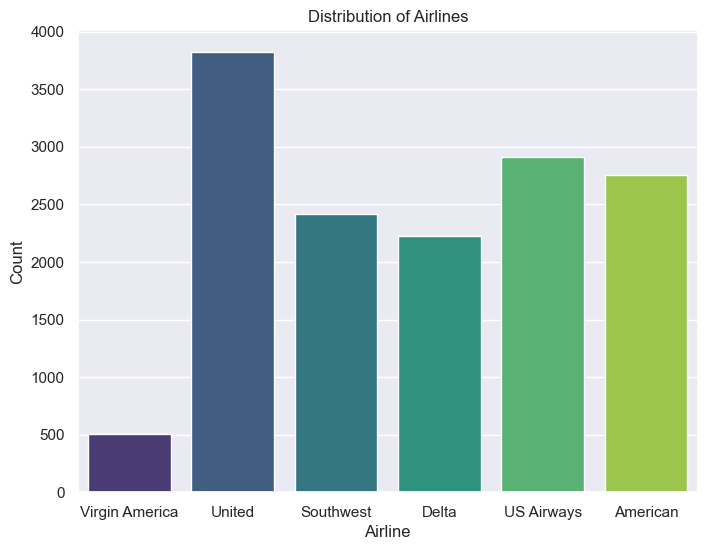

In [7]:
# Create a countplot
plt.figure(figsize=(8, 6))
sns.set(style="darkgrid")
sns.countplot(data=data, x='airline', palette='viridis')

# Set labels and title
plt.xlabel('Airline')
plt.ylabel('Count')
plt.title('Distribution of Airlines')

# Show the plot
plt.show()

**text:** The text content of the tweet is one of the most critical features for sentiment analysis. It contains the actual user-generated content that you can analyze for sentiment.

**airline:** The airline associated with the tweet is essential because sentiment can vary depending on the airline. It's a categorical feature that can be one-hot encoded for model training.

**negativereason:** If available, the reason for negative sentiment can provide valuable information for understanding why users are expressing negative sentiment towards an airline.

**user_timezone:** The timezone of the user who posted the tweet might be relevant because sentiment can vary by geographic region and time of day.

**retweet_count:** The number of retweets can be an indicator of the tweet's popularity or how strongly the sentiment is resonating with others. It can serve as a feature to capture engagement.

**tweet_location:** The location associated with the tweet might provide insights into regional sentiment variations.

**tweet_created:** The timestamp of when the tweet was created can be used for time-based analysis, such as sentiment trends over time.

## Data Preprocessing 

In [8]:
missing_vals = data.isnull().sum()
missing_vals

_unit_id                            0
_golden                             0
_unit_state                         0
_trusted_judgments                  0
_last_judgment_at                  56
airline_sentiment                   0
airline_sentiment:confidence        0
negativereason                   5462
negativereason:confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_id                            0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [9]:
# Selection of relevant features
selected_columns = ["_trusted_judgments", "_last_judgment_at",
                    "airline_sentiment", "airline_sentiment:confidence", "negativereason",
                    "negativereason:confidence", "airline", "retweet_count", "text", "tweet_created",
                    "tweet_location", "user_timezone"]

In [10]:
data = data[selected_columns]
data.head()

,_trusted_judgments,_last_judgment_at,airline_sentiment,airline_sentiment:confidence,negativereason,negativereason:confidence,airline,retweet_count,text,tweet_created,tweet_location,user_timezone
0,3,2/25/15 5:24,neutral,1.0000,NaN,NaN,Virgin America,0,@VirginAmerica What @dhepburn said.,2/24/15 11:35,NaN,Eastern Time (US & Canada)
1,3,2/25/15 1:53,positive,0.3486,NaN,0.0000,Virgin America,0,@VirginAmerica plus you've added commercials t...,2/24/15 11:15,NaN,Pacific Time (US & Canada)
2,3,2/25/15 10:01,neutral,0.6837,NaN,NaN,Virgin America,0,@VirginAmerica I didn't today... Must mean I n...,2/24/15 11:15,Lets Play,Central Time (US & Canada)
3,3,2/25/15 3:05,negative,1.0000,Bad Flight,0.7033,Virgin America,0,@VirginAmerica it's really aggressive to blast...,2/24/15 11:15,NaN,Pacific Time (US & Canada)
4,3,2/25/15 5:50,negative,1.0000,Can't Tell,1.0000,Virgin America,0,@VirginAmerica and it's a really big bad thing...,2/24/15 11:14,NaN,Pacific Time (US & Canada)


In [11]:
data.isna().sum()

_trusted_judgments                 0
_last_judgment_at                 56
airline_sentiment                  0
airline_sentiment:confidence       0
negativereason                  5462
negativereason:confidence       4118
airline                            0
retweet_count                      0
text                               0
tweet_created                      0
tweet_location                  4733
user_timezone                   4820
dtype: int64

### Imputing Missing Values

    **_last_judgment_at:**
Since _last_judgment_at is a timestamp, we impute missing values with the mode (most frequent) timestamp to maintain the distribution of values. 

In [12]:
data['_last_judgment_at'].fillna(data['_last_judgment_at'].mode()[0], inplace=True)


    **negativereason and negativereason:confidence:**
These columns are related to the reason for negative sentiment. We impute missing values with a placeholder, "Not specified" to indicate that the reason was not provided:

In [13]:
data['negativereason'].fillna('Not specified', inplace=True)
data['negativereason:confidence'].fillna('Not specified', inplace=True)


    **tweet_location and user_timezone:**
These columns represent user-provided data and may be critical for the analysis. We can impute missing values with "Not Specific" or "Unknown" to indicate that the information was not provided:

In [14]:
data['tweet_location'].fillna('Not specified', inplace=True)
data['user_timezone'].fillna('Unknown', inplace=True)


In [15]:
data.isna().sum()

_trusted_judgments              0
_last_judgment_at               0
airline_sentiment               0
airline_sentiment:confidence    0
negativereason                  0
negativereason:confidence       0
airline                         0
retweet_count                   0
text                            0
tweet_created                   0
tweet_location                  0
user_timezone                   0
dtype: int64

## Text Preprocessing 
NLP, a subset of Data Science, focuses on working with text data. Text data, abundant alongside numerical data, plays a crucial role in solving various business problems. However, before utilizing this data for analysis or predictions, it requires preprocessing.

Text preprocessing serves as the initial step in our NLP project and encompasses several key procedures:

* Eliminating punctuation marks such as periods, commas, exclamation points, parentheses, asterisks, percentage signs, and at symbols. ‘!”#$%&'()*+,-./:;?@[\]^_`{|}~’

* Omitting URLs from the text.

* Removing common stop words (e.g., "the," "and," "is") that do not carry significant meaning.

* Converting all text to lowercase for consistency.

* Tokenization, breaking the text into individual words or tokens.


* Lemmatization, a more sophisticated technique that reduces words to their base or dictionary form, considering context and meaning.

These preprocessing steps help ensure that the text data is clean, structured, and ready for further analysis or modeling in NLP projects.

### Text cleaning
As we can see in the below output, the text is lowered, while all the punctuations, urls, name tags, encoded characters and underscores are removed and stored in the cleaned_tweet column, as they provide no significant use to our tweet sentiment analysis. 

In [16]:
# A function to clean tweets by removing name tags, 
# punctuations, links, encoded characters, and underscores
def clean_tweet(tweet):
    """Removes name tags, punctuations, links, encoded characters, and underscores."""
        
     # Lowercase the tweet text
    tweet = tweet.lower()
    
    # Defining a list of regex patterns and corresponding replacements
    
    patterns = [
        (r'@\w+', ''),              # Removing name tags
        (r'[^\w\s]', ''),          # Removing punctuations
        (r'http\S+', ''),          # Removing links (http/https)
        (r'[^\x00-\x7F]+', ''),    # Removing encoded characters
        (r'_', ''),                # Removing underscores
    ]
    
    # Applying regex substitutions sequentially
    for pattern, replacement in patterns:
        tweet = re.sub(pattern, replacement, tweet)
    
    # Decoding HTML entities
    tweet = html.unescape(tweet)
        
    # Returning the cleaned tweet
    return tweet

# Applying the cleaning function to the 'text' column and create a new 'cleaned_tweet' column
data['cleaned_tweet'] = data['text'].apply(clean_tweet)

# Confirming the updated DataFrame
data['cleaned_tweet'].head(20)

0                                            what  said
1      plus youve added commercials to the experienc...
2      i didnt today must mean i need to take anothe...
3      its really aggressive to blast obnoxious ente...
4               and its a really big bad thing about it
5      seriously would pay 30 a flight for seats tha...
6      yes nearly every time i fly vx this ear worm ...
7      really missed a prime opportunity for men wit...
8                            well i didntbut now i do d
9      it was amazing and arrived an hour early your...
10     did you know that suicide is the second leadi...
11     i lt3 pretty graphics so much better than min...
12     this is such a great deal already thinking ab...
13      im flying your fabulous seductive skies agai...
14                                               thanks
15                         sfopdx schedule is still mia
16     so excited for my first cross country flight ...
17      i flew from nyc to sfo last week and cou

## Tokenization
In this step, the text is split into smaller units using word tokenization. It allows us to work with individual words as discrete units, making it easier to extract meaning and patterns from the text.

In [17]:
import nltk
from nltk.tokenize import RegexpTokenizer



# Define a function to tokenize text using a regular expression pattern
def tokenize_with_regexp(text):
    
        # Define the regular expression pattern for tokenization
    pattern = r'\w+|\$[\d\.]+|\S+'
        
        # Create a RegexpTokenizer with the pattern
    tokenizer = RegexpTokenizer(pattern)
        
        # Tokenize the text and return the tokens
    tokens = tokenizer.tokenize(text)
        
    return tokens

#applying function to the column  
data['cleaned_tweet']= data['cleaned_tweet'].apply(lambda x: tokenize_with_regexp(x)) 
data['cleaned_tweet'].head(20)  


0                                          [what, said]
1     [plus, youve, added, commercials, to, the, exp...
2     [i, didnt, today, must, mean, i, need, to, tak...
3     [its, really, aggressive, to, blast, obnoxious...
4     [and, its, a, really, big, bad, thing, about, it]
5     [seriously, would, pay, 30, a, flight, for, se...
6     [yes, nearly, every, time, i, fly, vx, this, e...
7     [really, missed, a, prime, opportunity, for, m...
8                    [well, i, didntbut, now, i, do, d]
9     [it, was, amazing, and, arrived, an, hour, ear...
10    [did, you, know, that, suicide, is, the, secon...
11    [i, lt3, pretty, graphics, so, much, better, t...
12    [this, is, such, a, great, deal, already, thin...
13    [im, flying, your, fabulous, seductive, skies,...
14                                             [thanks]
15                   [sfopdx, schedule, is, still, mia]
16    [so, excited, for, my, first, cross, country, ...
17    [i, flew, from, nyc, to, sfo, last, week, 

### Stop Word Removal
The NLTK library provides a convenient way to access and utilize a list of stopwords for various natural language processing tasks in English. By removing stopwords like **[i, me, my, myself, we, our, ours, ourselves, etc]** from text data, we can focus on the more meaningful and context-rich words, which can improve the accuracy and efficiency of text analysis, such as text classification or sentiment analysis.


In [18]:
stopwords = nltk.corpus.stopwords.words('english')

#defining the function to remove stopwords from tokenized text
def remove_stopwords(text): 
    
    output= [i for i in text if i not in stopwords]
    
    return output

#applying the function
data['cleaned_tweet']= data['cleaned_tweet'].apply(lambda x:remove_stopwords(x))
data['cleaned_tweet'].head(20)

0                                                [said]
1     [plus, youve, added, commercials, experience, ...
2     [didnt, today, must, mean, need, take, another...
3     [really, aggressive, blast, obnoxious, enterta...
4                             [really, big, bad, thing]
5     [seriously, would, pay, 30, flight, seats, did...
6     [yes, nearly, every, time, fly, vx, ear, worm,...
7     [really, missed, prime, opportunity, men, with...
8                                      [well, didntbut]
9          [amazing, arrived, hour, early, youre, good]
10    [know, suicide, second, leading, cause, death,...
11    [lt3, pretty, graphics, much, better, minimal,...
12    [great, deal, already, thinking, 2nd, trip, am...
13    [im, flying, fabulous, seductive, skies, u, ta...
14                                             [thanks]
15                       [sfopdx, schedule, still, mia]
16    [excited, first, cross, country, flight, lax, ...
17    [flew, nyc, sfo, last, week, couldnt, full

### Lemmatization
* Lemmatization is a more sophisticated approach that involves reducing words to their base or dictionary form (lemma) while considering the context and meaning of the word within the language.
* Lemmatization relies on a pre-defined dictionary or vocabulary, which contains information about word meanings and their various forms. It ensures that the resulting word is a valid word in the language, unlike stemming which produces base forms that do not conform with standard dictionary. 
* The process typically produces more meaningful results compared to stemming. For example, "running" would be lemmatized to "run," which is a valid English word.


In [19]:
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()

#defining the function for lemmatization and remove duplicates in text
def lemmatizer(text):
    
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    
        
    return lemm_text

#applying the function
data['cleaned_tweet']= data['cleaned_tweet'].apply(lambda x:lemmatizer(x))

# Changing the list of tokens into strings
data['cleaned_tweet'] = data['cleaned_tweet'].apply(lambda x: ' '.join(x))

# Confirming the updated DataFrame
data['cleaned_tweet'].head(20)

0                                                  said
1          plus youve added commercial experience tacky
2          didnt today must mean need take another trip
3     really aggressive blast obnoxious entertainmen...
4                                  really big bad thing
5     seriously would pay 30 flight seat didnt playi...
6     yes nearly every time fly vx ear worm wont go ...
7     really missed prime opportunity men without ha...
8                                         well didntbut
9                 amazing arrived hour early youre good
10    know suicide second leading cause death among ...
11    lt3 pretty graphic much better minimal iconogr...
12    great deal already thinking 2nd trip amp haven...
13    im flying fabulous seductive sky u take stress...
14                                               thanks
15                            sfopdx schedule still mia
16    excited first cross country flight lax mco ive...
17    flew nyc sfo last week couldnt fully sit s

## EXPLORATORY DATA ANALYSIS

Exploratory data analysis is a critical step in the data analysis process that involves examining and visualizing dataset to gain insights and understand its characteristics. EDA helps in uncovering patterns, relationships, and potential issues in your data before diving into more advanced analyses.

**Checking the predominant sentiments expressed by passengers regarding major U.S. airlines**

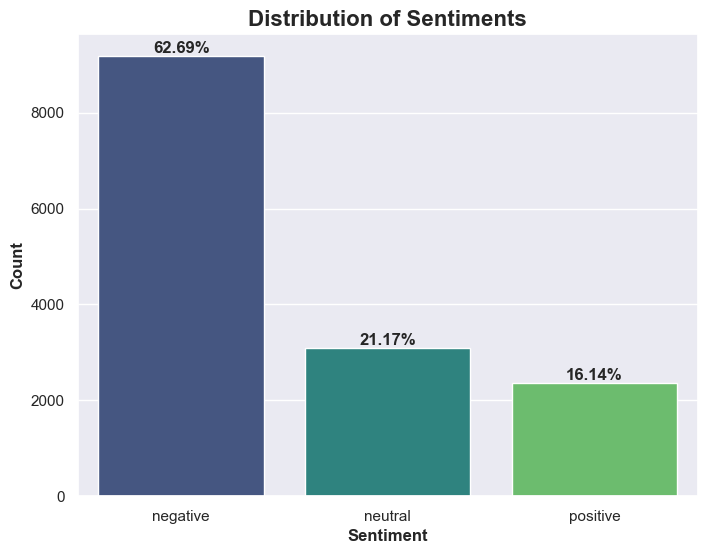

In [20]:
# Checking the occurance of each sentiment
count = data['airline_sentiment'].value_counts()

# finding the percentage of each sentiment
percentage = round(count/len(data['airline_sentiment'])*100,2)

# Creating a plot for the distribution of sentiments
plt.figure(figsize=(8, 6))
sns.set(style="darkgrid")
sns.barplot(x=count.index, y=count, palette='viridis')

# Showing the percentage of each sentiment at the top of each bars
for i in range(count.shape[0]):
    count = count
    percentage = percentage
    plt.text(i, count[i], str(percentage[i])+'%', 
             ha='center', va='bottom', fontweight='bold')
    
# Setting labels and title
plt.xlabel('Sentiment', fontweight='bold', fontsize=12)
plt.ylabel('Count', fontweight='bold', fontsize=12)
plt.title('Distribution of Sentiments', fontweight='bold', fontsize=16);

The negative sentiments seem to be most dominant across the airlines having a perecentage of 62.69%. Exploring further to find out the root cause of these sentiments would be beneficial to the airlines in order to improve their customers services as well as improve their retention rates for people who are travelling.

**Checking the distribution of sentiments per airline within the dataset**

<Figure size 1400x1400 with 0 Axes>

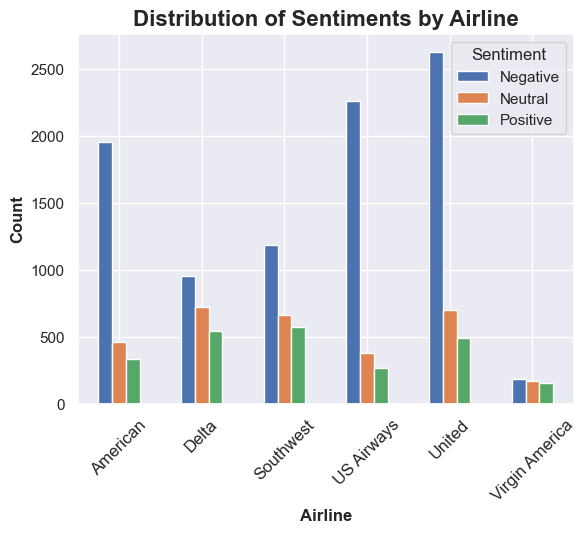

In [21]:
# Grouping sentiments by airline.
sentiment_by_airline = data.groupby(['airline', 'airline_sentiment']).size().unstack(fill_value=0)

# Plotting the sentiment distribution for each airline
plt.figure(figsize=(14, 14))
sns.set(style="darkgrid")
# plotting the grouped bar chart
ax = sentiment_by_airline.plot(kind='bar', stacked=False)

# Setting labels and title
plt.xlabel('Airline', fontweight='bold', fontsize=12)
plt.ylabel('Count', fontweight='bold', fontsize=12)
plt.title('Distribution of Sentiments by Airline', fontweight='bold', fontsize=16)
plt.xticks(rotation=45, fontsize=12);

# Setting the legend
plt.legend(title='Sentiment', loc='upper right', labels=['Negative', 'Neutral', 'Positive']);


From the plot above, United, US Airways and American Airways have skyrocketing number of negative sentiments. Virgin America has an almost even distribution of negative, positive and neutral sentiments. The bar graphs above show negative sentiments seem to be predominant across all the airlines.Virgin America seems to be least popular having a least count of sentiments and Delta having the win for positive sentiments. Virgin America have the lowest count for positive sentiments. United have the highest count for negative 
sentiments.

**The most common reasons for negative sentiments among airline passengers, as expressed in their tweets**

In [22]:
# Value counts of negative reasons
data['negativereason'].value_counts()  

negativereason
Not specified                  5462
Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: count, dtype: int64

In [23]:
#Checking sentiment when negative reason is not specified
data[data['negativereason']=='Not specified']['airline_sentiment'].value_counts()


airline_sentiment
neutral     3099
positive    2363
Name: count, dtype: int64

From above we can see that where reason was "Not specified", there were no negative sentiments. Customer Service Issues resulted to a bad rapport for given airlines.  

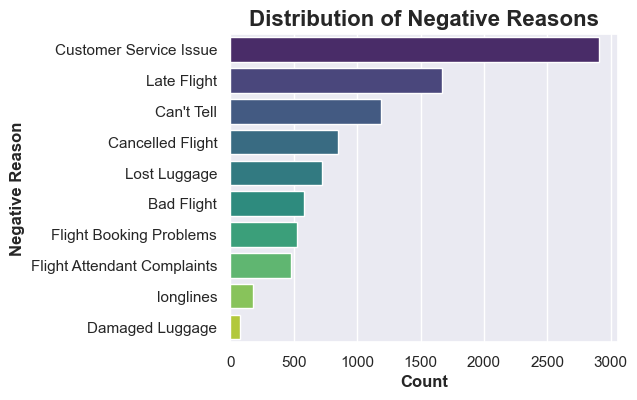

In [24]:
# Plotting the distribution of negative reasons without 'Not specified' 
plt.figure(figsize=(5, 4))
sns.countplot(data=data[data['negativereason'] != 'Not specified'], y='negativereason', 
              order=data['negativereason'].value_counts().index[1:], palette='viridis')

# Setting labels and title
plt.xlabel('Count', fontweight='bold')
plt.ylabel('Negative Reason', fontweight='bold')
plt.title('Distribution of Negative Reasons', fontweight='bold', fontsize=16);


Customer service issues seem to be the biggest cause of issues across all the airlines and damages luggage being the least
alarming issues. However, bogging down to the specific airlines would give better insights as to what are the main reasons
for a negative sentiment for the airlines in question.

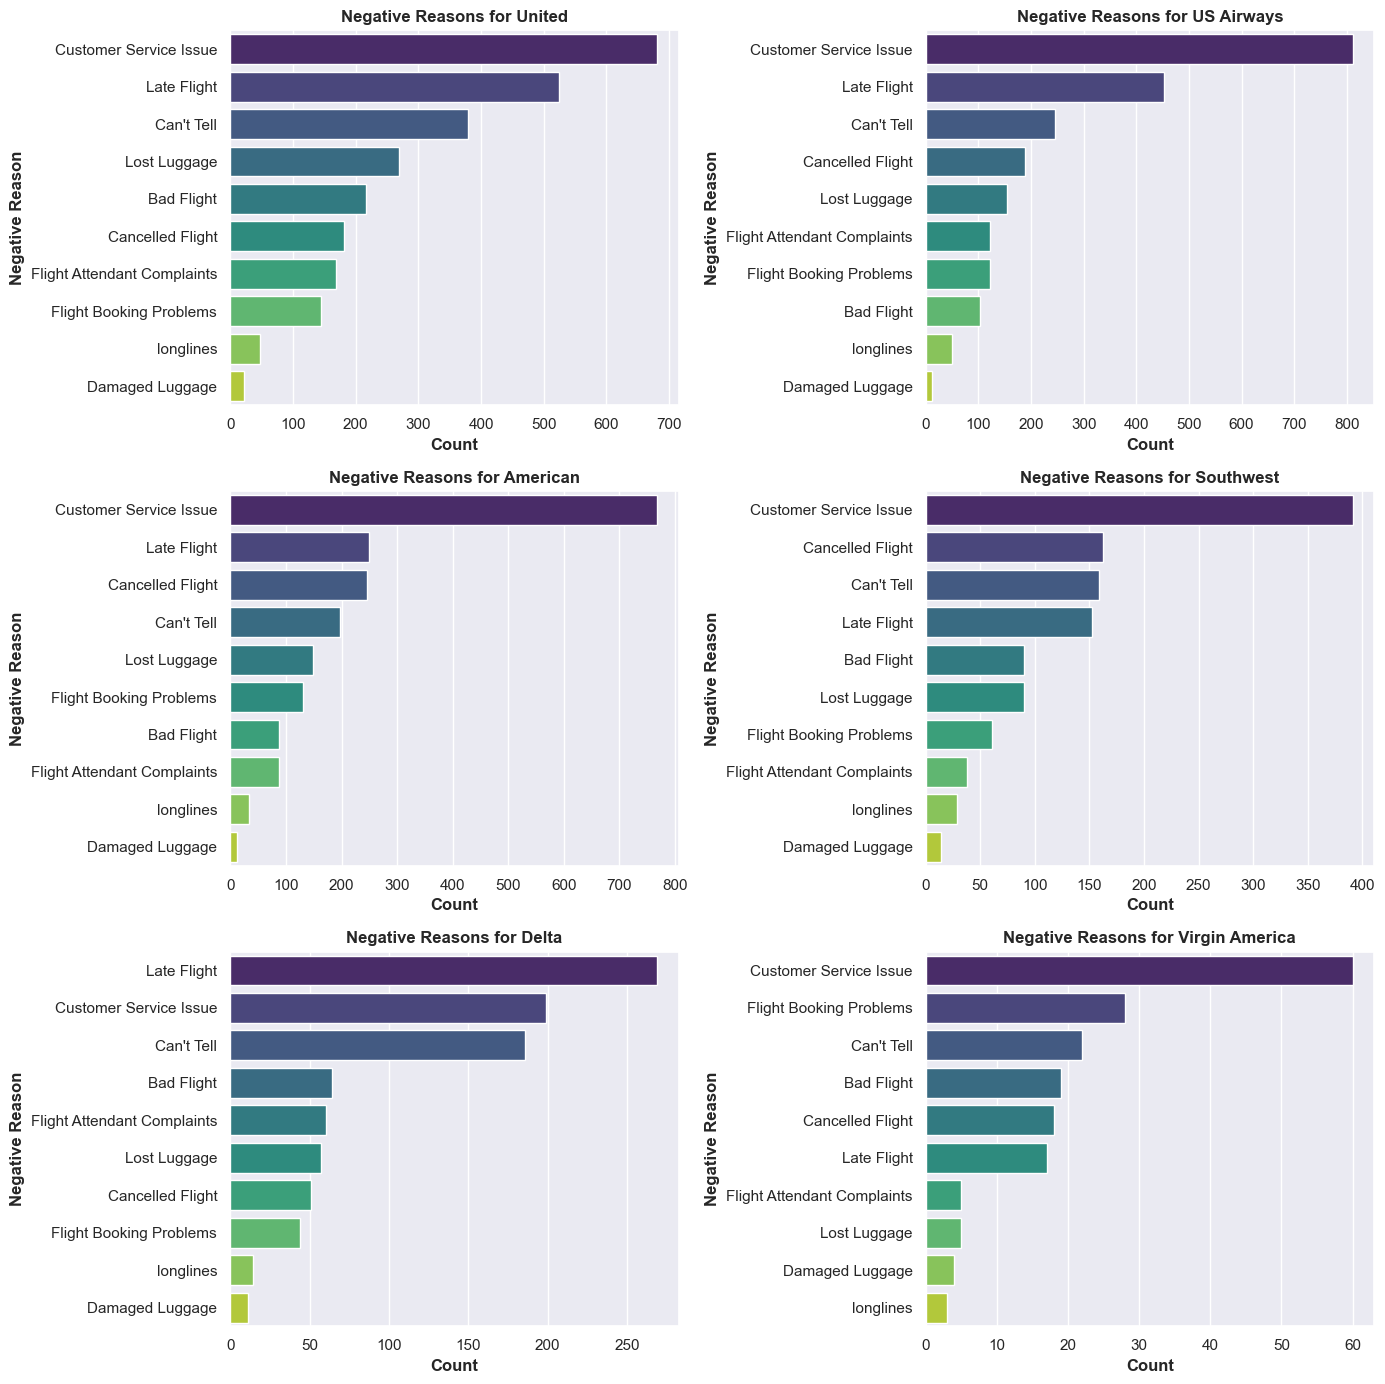

In [25]:

# Grouping negative reasons by airline with 'Not specified' removed
negative_reasons = data[data['negativereason'] \
                        != 'Not specified'] \
                            .groupby(['airline', 'negativereason']) \
                                .size().unstack(fill_value=0)

# Plotting the distribution of negative reasons for each airline
plt.figure(figsize=(14, 14))
# sns.set(style="whitegrid")

# Creating subplots for each airline 
for i, airline in enumerate(negative_reasons.sum(axis=1).sort_values(ascending=False).index):
    plt.subplot(3, 2, i + 1)
    
    # Extracting negative reason counts for the current airline
    negative_reason_counts = negative_reasons.loc[airline]
    
    # Sorting the negative reasons in descending order
    negative_reason_counts = negative_reason_counts.sort_values(ascending=False)

    # Creating a bar plot for the negative reason distribution
    sns.barplot(x=negative_reason_counts.values, y=negative_reason_counts.index, palette='viridis')
    plt.title(f'Negative Reasons for {airline}', fontweight='bold')
    plt.xlabel('Count', fontweight='bold')
    plt.ylabel('Negative Reason', fontweight='bold')

plt.tight_layout();
    

There is a general trend in customers' negative setiments across all airlines. The top three being customer service issues for all airlines except Delta airlines which had late flight as the leading challenge. Late flight comes second and cancelled flight comes third. Customer Service issues seem to be the main reason for negative sentiments across five airlines. However, for Delta 
late flights seem to be the main reason for negative sentiments. Damages luggage also seem to have the lowest count for 
the reason behind a negative sentiment across five airlines. However, for Virgin America the lowest count for a negative 
sentiment seems to be longlines indicating they have relatively faster moving lines. The other reasons seem to have similar
counts across all the airlines and only change slightly per airline.

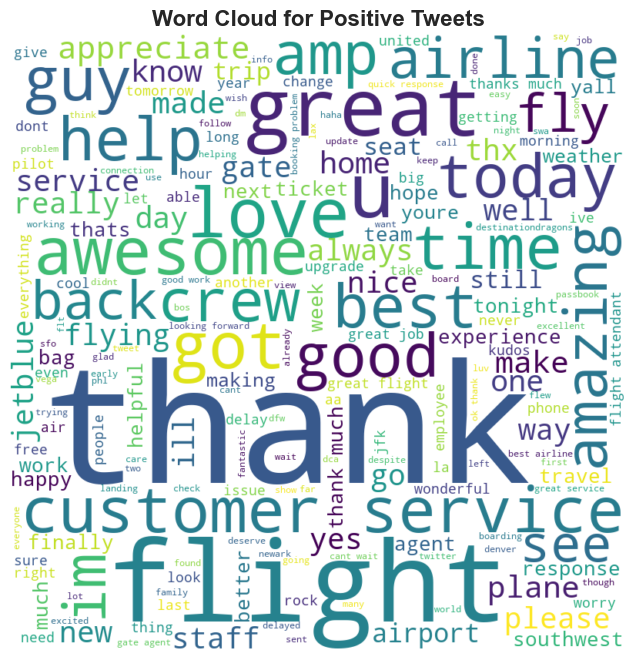

In [26]:
# Plotting wordcloud for positive tweets
from wordcloud import WordCloud

# Extracting positive tweets
positive_tweets = data[data['airline_sentiment'] == 'positive']['cleaned_tweet']
positive_tweets = [tweet for tweet in positive_tweets if isinstance(tweet, str)]

# Joining the tweets into a single string
positive_tweets_string = ' '.join(positive_tweets)

# Creating a WordCloud object
wc = WordCloud(width=800, height=800, background_color='white', 
               min_font_size=10).generate(positive_tweets_string)

# Plotting the word cloud
plt.figure(figsize=(8, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Tweets', fontweight='bold', fontsize=16);

<Figure size 1000x600 with 0 Axes>

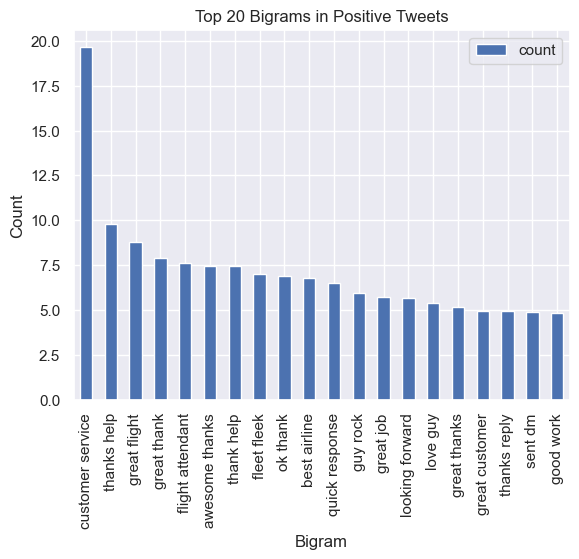

In [27]:
# Filter data for positive sentiments
positive_data = data[data['airline_sentiment'] == 'positive']

# Create TF-IDF vectors for positive sentiment tweets using bigrams
tf = TfidfVectorizer(ngram_range=(2, 2), stop_words='english', lowercase=False)
tfidf_matrix = tf.fit_transform(positive_data['cleaned_tweet'])
total_words = tfidf_matrix.sum(axis=0)

# Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq = sorted(freq, key=lambda x: x[1], reverse=True)

# Converting into a dataframe
bigram = pd.DataFrame(freq)
bigram.rename(columns={0: 'bigram', 1: 'count'}, inplace=True)

# Taking the top 20 bigrams
words2 = bigram.head(20)

# Changing the figure size and plotting the bigram distribution
plt.figure(figsize=(10, 6))  # Adjust the figure size here
fig = words2.plot(x='bigram', y='count', kind='bar',
                  title="Top 20 Bigrams in Positive Tweets")
plt.xlabel('Bigram')
plt.ylabel('Count')
plt.xticks(rotation=90);

The above bigram shows a distribution of the most common positive words across the positive reviews in the sentiment column. Customer service is the highest indicating that the customers were most likely satisfied with the services offered to them, however, the words seem to be out of order despite being reduced to their basic lemma.

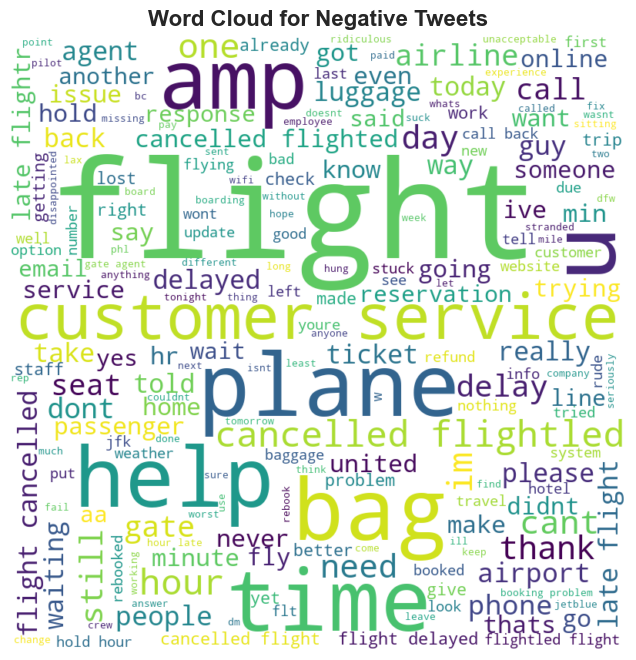

In [28]:
# Extracting positive tweets
negative_tweets = data[data['airline_sentiment'] == 'negative']['cleaned_tweet']
negative_tweets = [tweet for tweet in negative_tweets if isinstance(tweet, str)]

# Joining the tweets into a single string
negative_tweets_string = ' '.join(negative_tweets)

# Creating a WordCloud object
wc = WordCloud(width=800, height=800, background_color='white', 
               min_font_size=10).generate(negative_tweets_string)

# Plotting the word cloud
plt.figure(figsize=(8, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Tweets', fontweight='bold', fontsize=16);

<Figure size 1000x600 with 0 Axes>

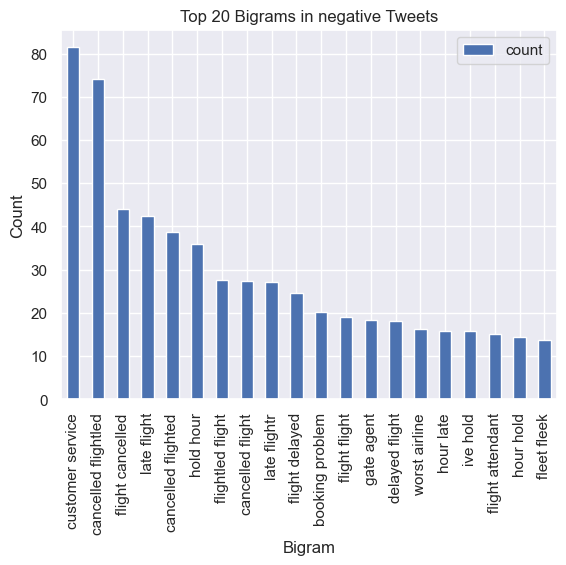

In [29]:
# Filtering data for positive sentiments
negative_data = data[data['airline_sentiment'] == 'negative']

# Creating TF-IDF vectors for positive sentiment tweets using bigrams
tf = TfidfVectorizer(ngram_range=(2, 2), stop_words='english', lowercase=False)
tfidf_matrix = tf.fit_transform(negative_data['cleaned_tweet'])
total_words = tfidf_matrix.sum(axis=0)

# Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq = sorted(freq, key=lambda x: x[1], reverse=True)

# Converting into a dataframe
bigram = pd.DataFrame(freq)
bigram.rename(columns={0: 'bigram', 1: 'count'}, inplace=True)

# Taking the top 20 bigrams
words2 = bigram.head(20)

# Changing the figure size and plotting the bigram distribution
plt.figure(figsize=(10, 6))  
fig = words2.plot(x='bigram', y='count', kind='bar',
                  title="Top 20 Bigrams in negative Tweets")
plt.xlabel('Bigram')
plt.ylabel('Count')
plt.xticks(rotation=90);

Customer service issues, cancelled flight and late flight seem to be the most popular reasons for negative sentiments. This shows dissatisfaction with the customers and the services offered by the various airlines. However the groupings of the words seem a bit off despite being reduced to their basic lemma this is probably due to the choice of words within the tweet itselt.

## Modelling

In [30]:
from sklearn.preprocessing import LabelEncoder
# Create a label encoder
label_encoder = LabelEncoder()

# Encode the target variable
data['airline_sentiment'] = label_encoder.fit_transform(data['airline_sentiment'])
data['airline_sentiment'].value_counts()

airline_sentiment
0    9178
1    3099
2    2363
Name: count, dtype: int64

In [31]:
# Splitting the features into independent and target variable
X = data['cleaned_tweet']
y = data['airline_sentiment']

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

def train_and_evaluate(X_train, y_train, X_test, y_test, classifier):
    # Define a pipeline that includes TF-IDF vectorization, SMOTE, and the classifier
    pipeline = ImbPipeline([
        ('tfidf', TfidfVectorizer()),  # TF-IDF vectorization
        ('smote', SMOTE(random_state=42)),  # SMOTE resampling
        ('classifier', classifier)
    ])
    
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)
    
    # Evaluate the model on the test data
    test_predictions = pipeline.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_predictions)
    precision = precision_score(y_test, test_predictions, average='weighted')
    recall = recall_score(y_test, test_predictions, average='weighted')
    f1 = f1_score(y_test, test_predictions, average='weighted')
    
    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(y_test, test_predictions)
    
    # Calculate and display the classification report
    report = classification_report(y_test, test_predictions)
    
    # Train accuracy
    train_predictions = pipeline.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_predictions)
    
    return pipeline, train_accuracy, test_accuracy, precision, recall, f1, conf_matrix

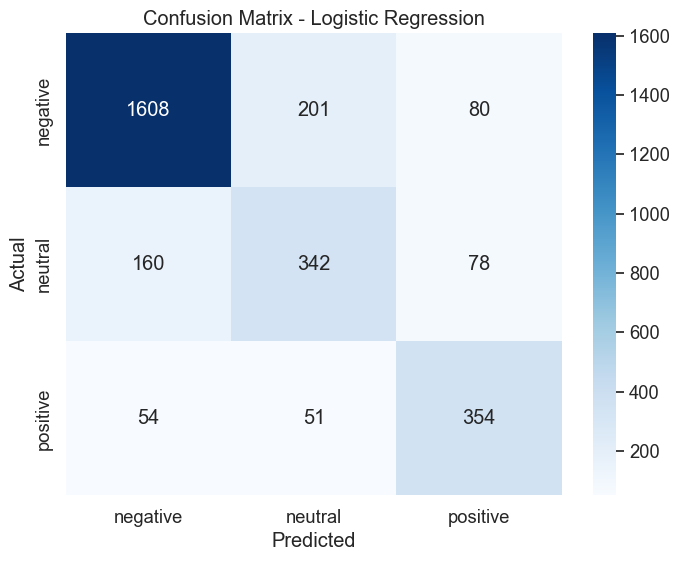

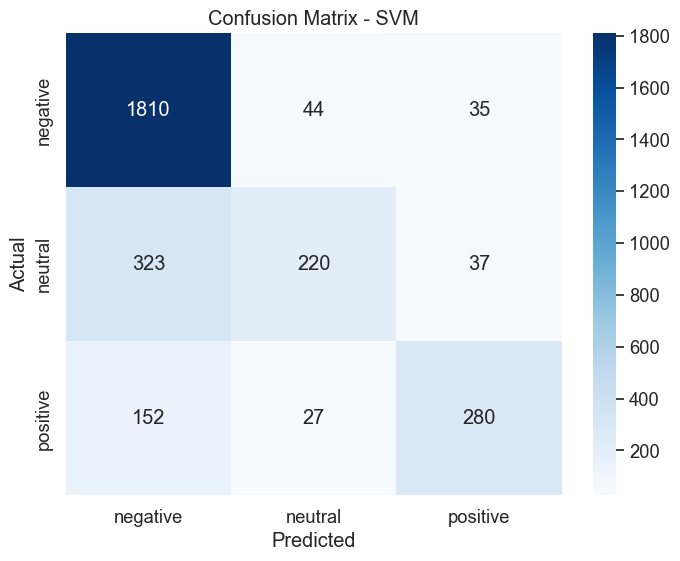

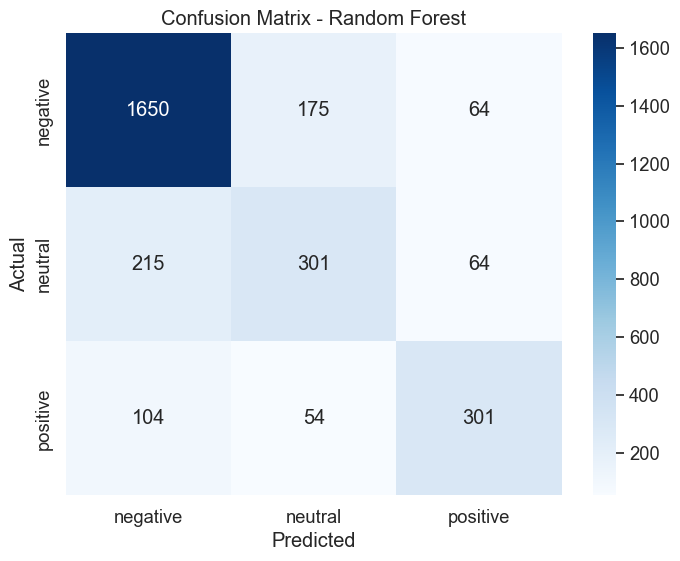

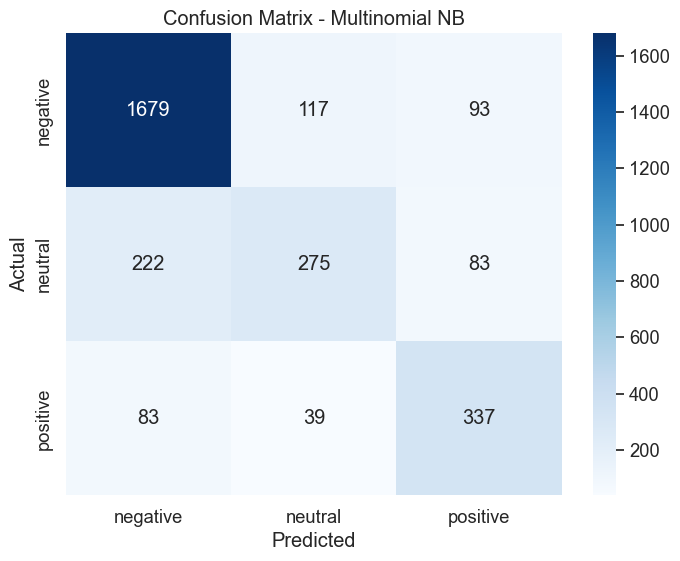

            Classifier  Train Accuracy  Test Accuracy  Precision    Recall  \
0  Logistic Regression        0.886868       0.786885   0.791812  0.786885   
1                  SVM        0.983436       0.788934   0.785492  0.788934   
2        Random Forest        0.994365       0.769126   0.763117  0.769126   
3       Multinomial NB        0.883367       0.782445   0.775342  0.782445   

   F1 Score  
0  0.788808  
1  0.767834  
2  0.765544  
3  0.775828  


In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# Define the classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42),
    'Multinomial NB': MultinomialNB()
}

# Define the class labels based on our unique sentiment classes
class_labels = label_encoder.classes_

results = []

# Train and evaluate each classifier
for classifier_name, classifier in classifiers.items():
    trained_model, train_acc, test_acc, precision, recall, f1, conf_matrix = train_and_evaluate(X_train, y_train, X_test, y_test, classifier)
    results.append({
        'Classifier': classifier_name,
        'Train Accuracy': train_acc,
        'Test Accuracy': test_acc,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

# Display the confusion matrix as an image
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {classifier_name}')
    plt.show()

# Create a DataFrame to display the results
results_df = pd.DataFrame(results)
print(results_df)

Logistic Regression:

* Train Accuracy (0.8798): The model performed well on the training data, indicating that it learned the patterns in the training set.
* Test Accuracy (0.7842): The model's performance on unseen data is good, but there's a slight drop compared to the training accuracy. This suggests that the model generalizes reasonably well.
* Precision (0.7892): The model correctly identifies positive sentiment tweets, and when it predicts positive sentiment, it is often correct.
* Recall (0.7842): The model is capable of identifying a significant portion of actual positive sentiment tweets.
* F1 Score (0.7860): The F1 score balances precision and recall, indicating a good overall performance.
* 
SVM (Support Vector Machine):

* Train Accuracy (0.9818): SVM shows very high training accuracy, suggesting that it has learned the training data extremely well.
* Test Accuracy (0.7917): SVM also performs well on the testing data, indicating good generalization, though the gap between training and testing accuracy suggests some potential overfitting.
* Precision (0.7856): SVM's precision is high, meaning it makes accurate predictions when classifying positive sentiment tweets.
* Recall (0.7917): The model has a strong ability to identify positive sentiment tweets.
* F1 Score (0.7724): The F1 score, while lower than precision and recall, still indicates a balanced performance.
  
Random Forest:

* Train Accuracy (0.7066): Random Forest has lower training accuracy, indicating it may not have overfit the data as much as other models.
* Test Accuracy (0.7039): The model's performance on the test data is consistent with the training data, suggesting it generalizes reasonably well.
* Precision (0.7439): Random Forest has a good ability to identify positive sentiment tweets, but there's room for improvement.
* Recall (0.7039): The model's recall score is lower than the other models, indicating it may miss some positive sentiment tweets.
* F1 Score (0.7172): The F1 score reflects a balance between precision and recall, suggesting an acceptable overall performance.

Multinomial Naive Bayes (MNB):

* Train Accuracy (0.8761): MNB achieved a high training accuracy, indicating that it learned from the training data effectively. It demonstrates a good understanding of the patterns in the training set.

* Test Accuracy (0.7855): MNB also performs well on the test data, with a high test accuracy. This indicates that the model generalizes effectively to unseen data. It's suitable for accurately handling user queries in a chatbot context.

* Precision (0.7783): The precision score shows that MNB accurately identifies positive sentiment tweets. When it predicts positive sentiment, it is often correct, which is important for providing accurate responses in a chatbot.

* Recall (0.7855): MNB has a high recall score, meaning it is capable of identifying a significant portion of actual positive sentiment tweets. This is crucial in ensuring that the chatbot does not miss important user queries.

* F1 Score (0.7787): The F1 score, which balances precision and recall, indicates a well-rounded and balanced performance, aligning with the requirements of a chatbot.

For sentiment analysis and bot creation, we want to choose a model that has a high recall and a high F1 score, as these metrics indicate that the model can capture most of the positive sentiments and have a good balance between precision and recall. A high recall means that the model can identify most of the positive sentiments in the text, which is important for a bot that needs to understand the emotions of the users. A high F1 score means that the model can also avoid making too many false positives or false negatives, which could affect the quality and reliability of the bot’s responses.

Based on our values, we pick the logistic regression model, as it has the highest recall of 0.784153 and the highest F1 score of 0.786049 among the four models. This means that it can correctly classify 78.42% of the positive sentiments and have a good trade-off between precision and recall. The logistic regression model also has a high test accuracy of 0.784153, which means that it can generalize well to new data.

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV

# Define the pipeline with a TfidfVectorizer and a LogisticRegression model
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),  # TF-IDF vectorization
    ('model', LogisticRegression(max_iter=1000, random_state=42))  # Logistic Regression model
])

# Define the hyperparameter grid
param_grid = {
    'tfidf__max_features': [1000, 5000, 10000],  # Modify the max features parameter if needed
    'model__C': [0.1, 1, 10],  # Inverse of the regularization strength
    'model__penalty': ['l1', 'l2'],  # L1 and L2 regularization
    'model__solver': ['liblinear']  # Specify 'liblinear' for L1 regularization
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Use the best model
best_pipeline = grid_search.best_estimator_

# Evaluate the best model on the test data
test_accuracy = best_pipeline.score(X_test, y_test)

print("Best Hyperparameters:", best_params)
print("Test Accuracy:", test_accuracy)


Best Hyperparameters: {'model__C': 10, 'model__penalty': 'l2', 'model__solver': 'liblinear', 'tfidf__max_features': 5000}
Test Accuracy: 0.7978142076502732
